In [14]:
%matplotlib inline

In [15]:
import pyproj
import pandas as pd
import osr
from gdalconst import *
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm

In [16]:
def get_img(filename): 
    dataset = gdal.Open(filename, gdal.GA_ReadOnly)
    inSRS = 'PROJCS["New Zealand Map Grid",GEOGCS["International 1909 (Hayford)",DATUM["unknown",SPHEROID["intl",6378388,297]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["New_Zealand_Map_Grid"],PARAMETER["latitude_of_origin",-41],PARAMETER["central_meridian",173],PARAMETER["false_easting",2510000],PARAMETER["false_northing",6023150],UNIT["Meter",1],EXTENSION["PROJ4","+proj=nzmg +lat_0=-41 +lon_0=173 +x_0=2510000 +y_0=6023150 +ellps=intl +units=m +nadgrids=nzgd2kgrid0005.gsb +wktext"]]'
    inSRS_converter = osr.SpatialReference()# makes an empty spatial ref object
    inSRS_converter.ImportFromWkt(inSRS)# populates the spatial ref object with our WKT SRS
    inSRS_forPyProj = inSRS_converter.ExportToProj4()

    arr = dataset.ReadAsArray()
    gt = dataset.GetGeoTransform()
    cols = dataset.RasterXSize
    rows = dataset.RasterYSize
    min_lon = gt[0] 
    min_lat = gt[3] + rows*gt[5]  
    max_lon = gt[0] + cols*gt[1]
    max_lat = gt[3] 
    return arr, (min_lon, max_lon, min_lat, max_lat), inSRS_forPyProj,inSRS

In [17]:
def get_extent(georef, extent): 
    inproj = pyproj.Proj(georef)
    georef_out = '+proj=longlat +datum=WGS84 +no_defs '
    outproj = pyproj.Proj(georef_out)
    lonmin, latmin = pyproj.transform(inproj, outproj, extent[0], extent[2])
    lonmax, latmax = pyproj.transform(inproj, outproj, extent[1], extent[3])
    extent_conv = (lonmin, lonmax, latmin, latmax)
    return latmin, latmax, lonmin, lonmax, extent_conv

In [18]:
arr, extent, georef,inSRS = get_img('/home/paul/Downloads/Data_test/rain_decile_1month.txt')

In [19]:
latmin2, latmax2, lonmin2, lonmax2, extent_conv2 = get_extent(georef, extent)

In [20]:
extent_conv2  #current nzmg

(165.9811695299988, 179.45472496347858, -47.37619698004963, -32.84291783512453)

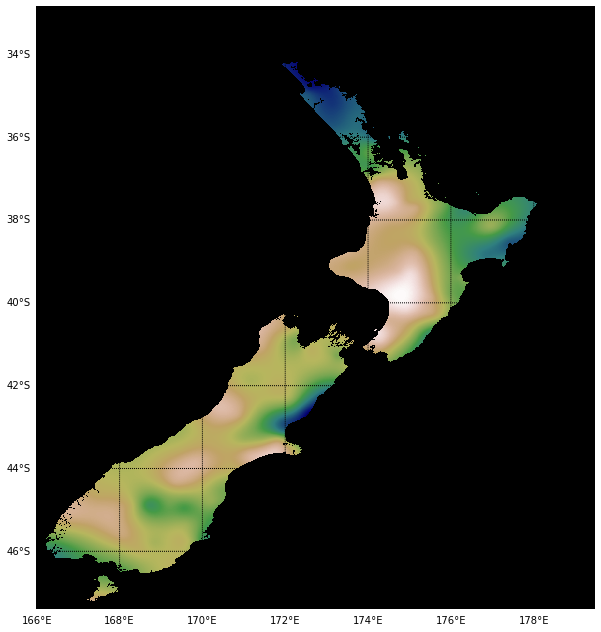

In [25]:
# ======================================================================================================================
# first map 
fig,ax = plt.subplots(figsize=(10,12))
map1 = Basemap(llcrnrlon=lonmin2,llcrnrlat=latmin2,urcrnrlon=lonmax2,urcrnrlat=latmax2, resolution = 'h', epsg=4326,ax=ax)
plt.imshow(arr ,interpolation='nearest', extent=extent_conv2 ,vmin=0,cmap=plt.cm.gist_earth)
# draw parallels
map1.drawparallels(np.arange(-90,90,2),labels=[1,0,0,1])
# draw meridians
map1.drawmeridians(np.arange(-180,180,2),labels=[1,0,0,1])
plt.show()

In [26]:
arr

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ..., 
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]], dtype=float32)